# 1 - Introduction

Nama : Dicky Librata Sembiring 

Dataset : ml_datasets

Objective : Memprediksi default_payment_next_month dengan menggunakan model machine

## Query SQL
SELECT\
      limit_balance, \
      CAST(sex AS INT) AS sex, \
      CAST(education_level AS INT) AS education_level,\
      CAST(marital_status AS INT) AS marital_status, \
      age, pay_0, pay_2, pay_3, pay_4, \
      CAST(pay_5 AS FLOAT64) AS pay_5,\
      CAST(pay_6 AS FLOAT64) AS pay_6, \
      bill_amt_1, bill_amt_2,bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,\
      pay_amt_1, pay_amt_2, pay_amt_3,pay_amt_4, pay_amt_5, pay_amt_6, \
      CAST(default_payment_next_month AS INT) AS  default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default` 

LIMIT 5988

# 2 - Import Libraries

> Berikut adalah library python yang digunakan

In [134]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import phik
from phik import resources, report

import pickle

# 3 - Data Loading

> Selanjutnya dilakukan loading dataset. Kemudian beberapa eksplorasi sederhana seperti melihat jumlah baris dan kolom data, nama dan type data masing - masing kolom, serta basic info dari data yang telah di load

In [70]:
# Load Dataset
df_ori = pd.read_csv('h8dsft_P1M1_dicky_librata.csv')

# Setting display pandas dataframe showing all columns
pd.set_option('display.max_columns', None) 
# Setting format floating to 2 decimal
pd.options.display.float_format = '{:.2f}'.format

Dari sumber dataset, penulis memperoleh informasi mengnai masing - masing column sebagai berikut:
- limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit
- Gender :
    - 1 = Male
    - 2 = Female
- Education Level : 
    - 1 = graduate school 
    - 2 = university 
    - 3 = high school 
    - 4 = others 
    - 5 = unknown 
    - 6 = unknown)
- Marital status :
    - 1 = married 
    - 2 = single
    - 3 = others
- Age : Age in years
- Pay_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- Pay_2, pay_3, pay_4, pay_5, pay_6 : Repayment for August, July, June, May, April
- bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, = Amount of bill satatement in September , August, July, June, May, April
- pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6 = Amount of previous payment in September , August, July, June, May, April
- Default payment : 
    - 1 = yes
    - 0 = no

In [71]:
# Duplicate Dataset
# Dilakukan agar data set original tidak berubah apabila dilakukan pengolahan pada data
df = df_ori.copy()
# Showing First 10 Data
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
5,500000,1,2,1,41,0,0,0,0,0,0,155820,171565,184782,152365,139757,153348,20000,20241,20154,20019,20151,20037,0
6,50000,1,2,1,40,0,0,0,0,0,0,49073,49531,44002,44356,19344,19354,1691,1942,1296,674,693,1000,0
7,100000,1,5,1,45,0,0,0,0,0,0,94502,95697,98222,90500,82586,22620,5000,5000,3203,2103,50000,0,0
8,140000,1,2,1,29,0,0,0,0,0,0,130767,134946,130470,132038,131961,124256,6696,5000,4866,5300,5055,5000,0
9,50000,1,2,1,43,0,0,0,0,0,0,48919,48775,48731,48934,29116,28999,1800,2200,1400,582,580,30000,0


In [72]:
# Showing 10 Last Data
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000,2,2,1,28,-1,-1,-1,-1,-2,-2,16666,1000,16666,0,0,0,1000,16666,0,0,0,0,0
2956,200000,2,1,1,49,-1,-1,-1,-1,-2,-2,413,0,103,0,0,0,0,103,0,0,0,225,0
2957,50000,2,1,2,31,-1,0,-1,-1,-1,-2,12725,34526,12787,3995,0,0,30018,12787,3995,0,0,0,0
2958,50000,2,1,2,25,-1,-1,2,-1,-1,-2,13572,17983,15590,10610,0,0,5000,200,10610,0,0,0,0
2959,100000,2,1,2,37,-1,-1,0,-1,-1,-2,1725,21711,10487,780,0,0,21711,1000,780,0,0,0,0
2960,30000,2,3,2,50,-1,-1,2,-1,-1,-2,178,1860,940,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650,0,855,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,-2,886,0,930,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0,0
2964,100000,2,1,2,30,-1,-1,-1,-1,-2,-2,430,35993,2772,0,0,0,35993,2772,0,0,0,0,0


In [73]:
# Jumlah baris dan kolom serta nama kolom
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")
print(f"Nama kolom : {df.columns}")


Jumlah baris : 2965
Jumlah kolom : 24
Nama kolom : Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')


In [74]:
# Check basic info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [75]:
# Check Numerical Dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.00,163369.31,125030.42,10000.00,50000.00,140000.00,230000.00,800000.00
sex,2965.00,1.61,0.49,1.00,1.00,2.00,2.00,2.00
education_level,2965.00,1.85,0.78,0.00,1.00,2.00,2.00,6.00
marital_status,2965.00,1.56,0.52,0.00,1.00,2.00,2.00,3.00
age,2965.00,35.19,9.11,21.00,28.00,34.00,41.00,69.00
pay_0,2965.00,0.01,1.11,-2.00,-1.00,0.00,0.00,8.00
pay_2,2965.00,-0.12,1.18,-2.00,-1.00,0.00,0.00,7.00
pay_3,2965.00,-0.14,1.18,-2.00,-1.00,0.00,0.00,7.00
pay_4,2965.00,-0.19,1.18,-2.00,-1.00,0.00,0.00,8.00
pay_5,2965.00,-0.23,1.16,-2.00,-1.00,0.00,0.00,7.00


> Berdasarkan tabel, dapat dilihat bahwa column `sex` memiliki rata-rata `1.62` dan nilai  `median` adalah `2`. Boleh di asumsikan bahwa secara global, pengguna kartu kredit mayoritas adalah `perempuan` 

# 4 - Exploratory Data Analysis (EDA)

> Setelah mengetahui beberapa info dasar, penulis kemudian melakukan eksplorasi lanjutan berupa pengecekan apakah ada data yang memiliki `duplicate` atau `missing value`, cek `distribusi data`, mencari `Insight` yang dapat disimpulkan, serta mencari hubungan setiap kolom terhadap kolom `price` yang merupakan target dari dataset ini

### Cek Missing Value dan Duplicate
Semua algooritma machine learning tidak dapat dapat bekerja apabila terdapat missing value. Sedangkan data duplicate akan membuat hasil prediksi model menjadi bias. Sehingga dilakukan proses handling missing value dan data dupilkat

In [76]:
# Cek missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

print(f"Duplicates Data : {df.duplicated().sum()}")

Tidak Ada Missing Value
Duplicates Data : 1


- Tidak ditemukan missing value pada dataset

- Terdapat `1` data duplicate pada dataset. Karena salah satu kriteria ( asumsi ) yang harus di penuhi pada machine learning adalah `tidak ada duplicate data` maka harus dilakukan `trimming` pada data ini.


In [77]:
# Drop data duplicate
df = df.drop_duplicates()

In [78]:
# Cek kembali data duplikat

print(f"Duplicates Data : {df.duplicated().sum()}")

Duplicates Data : 0


> Setelah tidak ada data yang memiliki missing value maupun data duplicate selanjutnya dilakukan analisa deskiriptif untuk memperoleh insight data dataset

### Analisa Deskriptif

In [79]:
# Grouping beberapa kolom untuk mendapatkan insgigh
df_sex_payment = df.groupby(['default_payment_next_month' ,'sex']).size()
df_lim_balance = df.groupby('education_level')[['limit_balance']].mean()

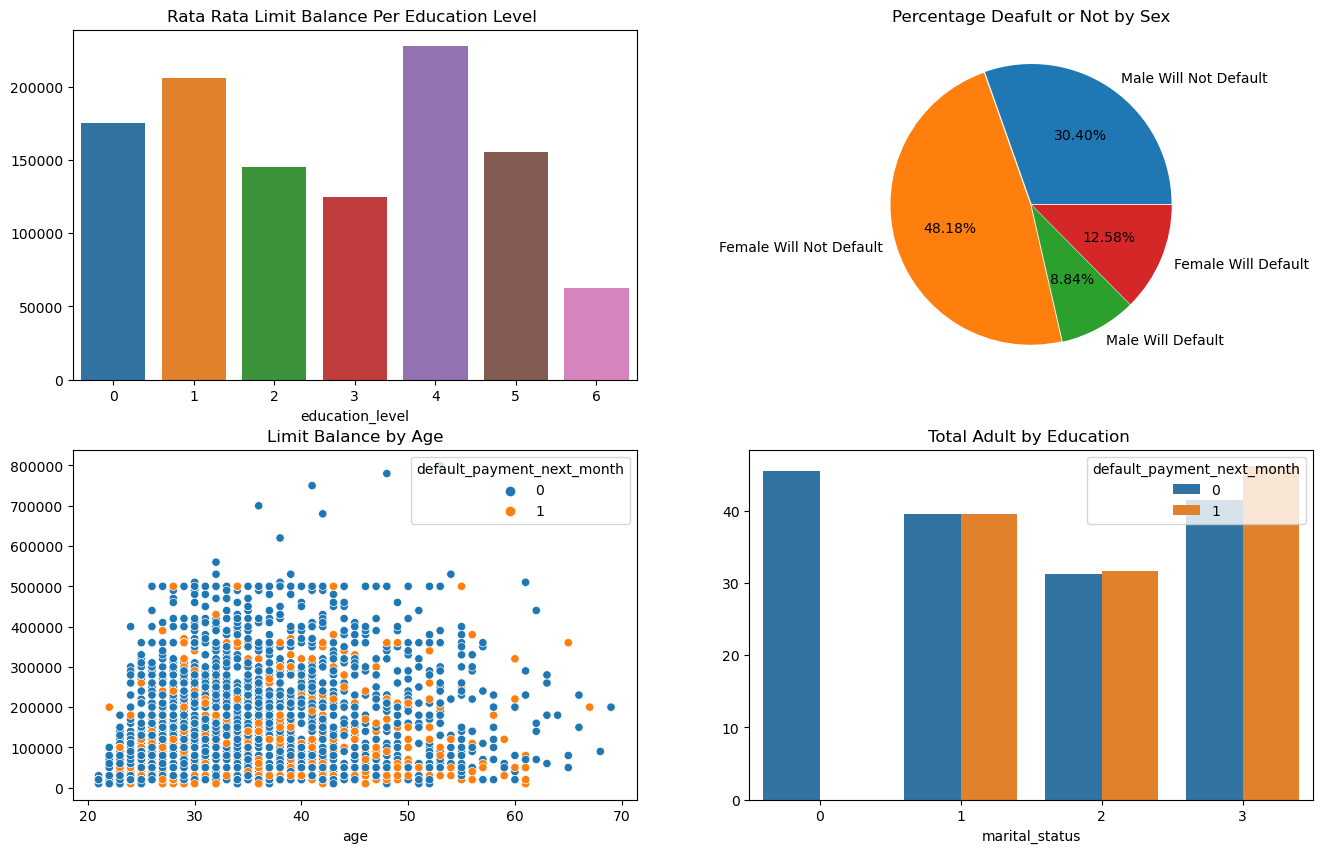

In [80]:
# Plot hasil grouping agar memudahkan dalam memperoleh insight
plt.figure( figsize=[16,10])

plt.subplot(2,2,1)
a = sns.barplot(data=df_lim_balance, y= 'limit_balance', x=df_lim_balance.index)
a.set(title='Rata Rata Limit Balance Per Education Level ', ylabel='')

label_sex_payment = ['Male Will Not Default', 'Female Will Not Default', 'Male Will Default', 'Female Will Default']
plt.subplot(2,2,2)
plt.pie(x=df_sex_payment, labels=label_sex_payment, autopct="%.2f%%", explode=[0.005]*4)
plt.title('Percentage Deafult or Not by Sex')

plt.subplot(2,2,3)
b = sns.scatterplot(data=df, x = 'age', y='limit_balance', hue='default_payment_next_month')
b.set(title='Limit Balance by Age', ylabel='')

plt.subplot(2,2,4)
b = sns.barplot(data=df, x = 'marital_status', y='age', hue='default_payment_next_month', ci=None)
b.set(title='Total Adult by Education ', ylabel='')
plt.show()

Dari hasil plotting diatas diperoleh beberapa informasi sbb :
- Tidak ada hubungan jenjang pendidikan dengan limit balance yang diberikan. Terbukti limit balance `graduate school` lebih tinggi dari `university` 
- Terdapat `8.8% pria` yang bulan depan akan `default` dan `12.6% wanita`. Sisanya sebanyak` 48.2% wanita` dan `30.4% pria` tidak mengalami default
- Umur tidak mempengaruhi limit balance kartu kredit customer
- Rata - rata usia customer yang sudah menikah mendekati 40 tahun sedangkan usia customer single sekitar 30 tahun.

Selanjutnya penulis berfokus pada demografi customer yang akan mengalami `default` pada bulan depan

In [81]:
# Query dan grouping data
default_1_edu = df[df['default_payment_next_month']==1].groupby('education_level').size()
default_1_marital = df[df['default_payment_next_month']==1].groupby('marital_status').size()
default_1_sex = df[df['default_payment_next_month']==1].groupby('sex').size()
default_1_lim_bal = df[df['default_payment_next_month']==1][['limit_balance']]

In [82]:
# Make a cataegori for limit balance
limit_balance_cat = []
for i in default_1_lim_bal.values:
    if i <= 50000:
        limit_balance_cat.append('Under 50K')
    elif i <= 100000:
        limit_balance_cat.append('Under 100K')
    elif i <= 200000:
        limit_balance_cat.append('Under 200K')    
    elif i <= 400000:
        limit_balance_cat.append('Under 400K') 
    else:
        limit_balance_cat.append('Over 400K')

In [83]:
# Grouping customer based on limit balance category before
default_1_lim_bal['limit_balance_cat'] = limit_balance_cat
default_1_lim_bal_groupby = default_1_lim_bal.groupby('limit_balance_cat').size()

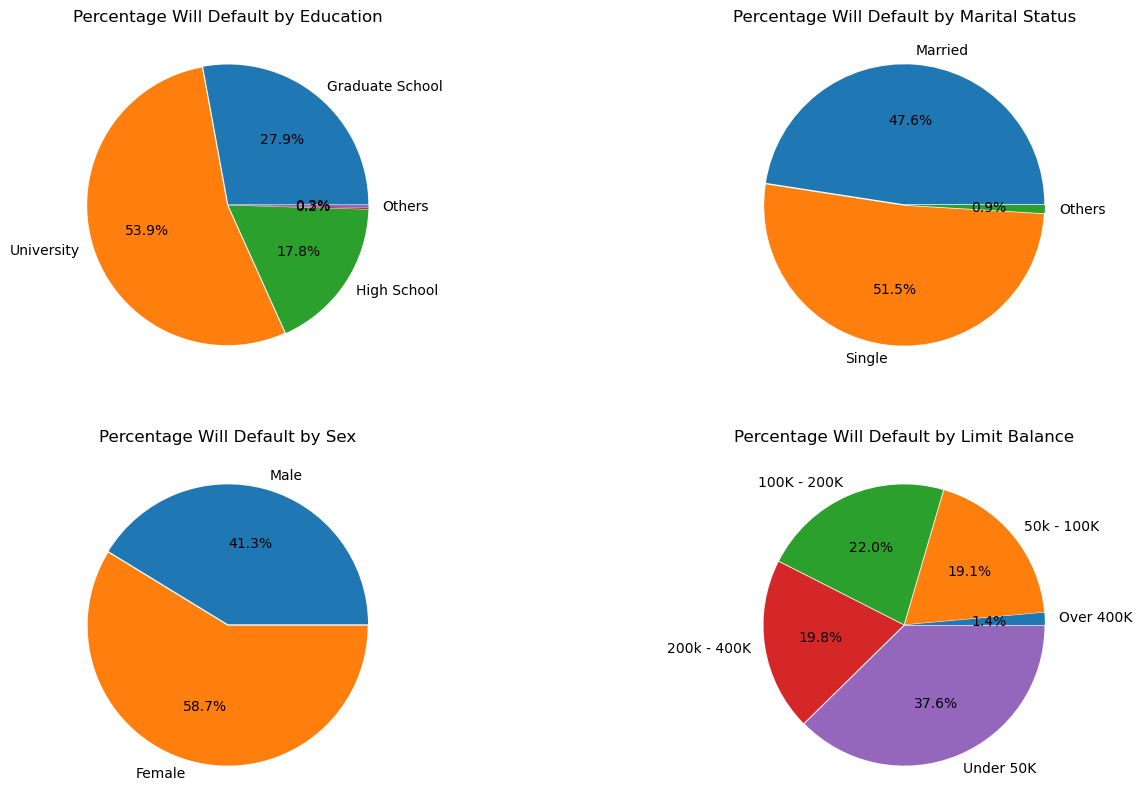

In [84]:
# Visualize query with pieplot
plt.figure(figsize=[16,10])

label_edu = ['Graduate School', 'University', 'High School','','Others']
plt.subplot(2,2,1)
plt.pie(x=default_1_edu, labels=label_edu, autopct="%.1f%%", explode=[0.005]*5)
plt.title('Percentage Will Default by Education')

label_marital = ['Married', 'Single', 'Others']
plt.subplot(2,2,2)
plt.pie(x=default_1_marital, labels=label_marital, autopct="%.1f%%", explode=[0.005]*3)
plt.title('Percentage Will Default by Marital Status')

label_sex = ['Male', 'Female']
plt.subplot(2,2,3)
plt.pie(x=default_1_sex, labels=label_sex, autopct="%.1f%%", explode=[0.005]*2)
plt.title('Percentage Will Default by Sex')

label_lim_bal = ['Over 400K', '50k - 100K', '100K - 200K', '200k - 400K','Under 50K']
plt.subplot(2,2,4)
plt.pie(x=default_1_lim_bal_groupby, labels=label_lim_bal, autopct="%.1f%%", explode=[0.005]*5)
plt.title('Percentage Will Default by Limit Balance')

plt.show()

Dari hasil *plotting* di atas, penulis dapat mengambil beberapa insight:

- Berdasarkan jenjang pendidikan, terdapat perbedaan yang signifikan pada customer yang akan mengalami default bulan depan. Jenjang pendidikan `university` merupakan mayoritas yang akan mengalami default sebanyak `53.9%`disusul oleh `graduate school` dengan `23.9%` dan `high school` dengan `17.8%`
- Sedangkan berdasarkan status pernikahan tidak terpaut jauh yakni `51.5%` dengan status `single` sisanya adalah customer yang sudah menikah. Sehingga penulis dapat mengasumsikan bahwa status pernikahan tidak mempengaruhi default.
- Begitupun dari sisi gender. `Wanita` yang akan default sebanyak `58,7%` sisanya adalah `pria` sebanyak `41.3%`.
- Yang menarik adalah mayoritas customer yang akan default memiliki limit balance `under 50K`. Sedangkan pada limit `'50k - 100K', '100K - 200K', '200k - 400K'` relatif sama pada range `19% - 22%` dan customer dengan limit `lebih dari 400K` hanya `1.4%`

### Feature Selection
Tahap selanjutnya setelah analisa deskriptif adalah feature selection. 

Pada tahap ini penulis ingin mencari korelasi antara semua kolom dengan kolom `'default_payment_next_month'`. Metode yang digunakan adalah phi_k correlation. Nilai korelasi ini akan digunakan untuk menentukan apakah suatu kolom memiliki hubungan dengan kolom `'default_payment_next_month'`


In [85]:
# Cek nilai korelasi semua fitur dengan kolom price
val_phik = df.phik_matrix().default_payment_next_month

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


In [86]:
# Sort nilai korelasi phi_k secara descending
val_phik.sort_values(ascending=False)

default_payment_next_month   1.00
pay_0                        0.60
pay_2                        0.47
pay_6                        0.39
pay_3                        0.33
pay_4                        0.32
pay_5                        0.32
limit_balance                0.19
bill_amt_4                   0.09
education_level              0.09
pay_amt_3                    0.08
bill_amt_1                   0.07
bill_amt_3                   0.07
age                          0.07
bill_amt_2                   0.06
pay_amt_4                    0.06
pay_amt_1                    0.05
pay_amt_5                    0.02
marital_status               0.02
bill_amt_5                   0.02
sex                          0.02
pay_amt_2                    0.00
bill_amt_6                   0.00
pay_amt_6                    0.00
Name: default_payment_next_month, dtype: float64

> Nilai korelasi `phi_k` adalah `0 = tidak berkorelasi` dan `1 = sangat berkorelasi`.
Dari nilai ini penulis menentukan threshold `0.15` yang memiliki arti `minimal terdapat 15 percent koreleasi`
 
> Kolom yang memiliki korelasi melebihi threshold adalah `pay_0, pay_2 ,pay_3, pay_4, pay_5, pay_6, limit_balance, default_payment_next_month`.

Sehingga diperoleh dataset baru sepeti berikut ini

In [87]:
# Query dataset baru 
df_new = df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 'default_payment_next_month']]
df_new.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment_next_month
0,0,0,0,0,0,0,130000,0
1,0,0,0,0,0,0,230000,1
2,0,0,0,0,0,0,200000,0


Selanjutnya, dengan dataset baru penulis melakukan pengecekan multicolinarity

### Cek Multicolinarity
Pengecekan multicolinarity menggunakan nilai dari VIF ( Variance Inflation Factor )

In [88]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df_new
calc_vif(X)

,variables,VIF
0,pay_0,1.96
1,pay_2,3.13
2,pay_3,3.41
3,pay_4,4.08
4,pay_5,4.81
5,pay_6,3.21
6,limit_balance,1.28
7,default_payment_next_month,1.28


Berdasarkan personal judgement, penulis menetapkan threshold untuk nilai `VIF` adalah `5`. Sehingga dari hasil query diatas `tidak ditemukan` fitur yang memiliki `multicolinarity`

## Cek Distribusi Data

[]

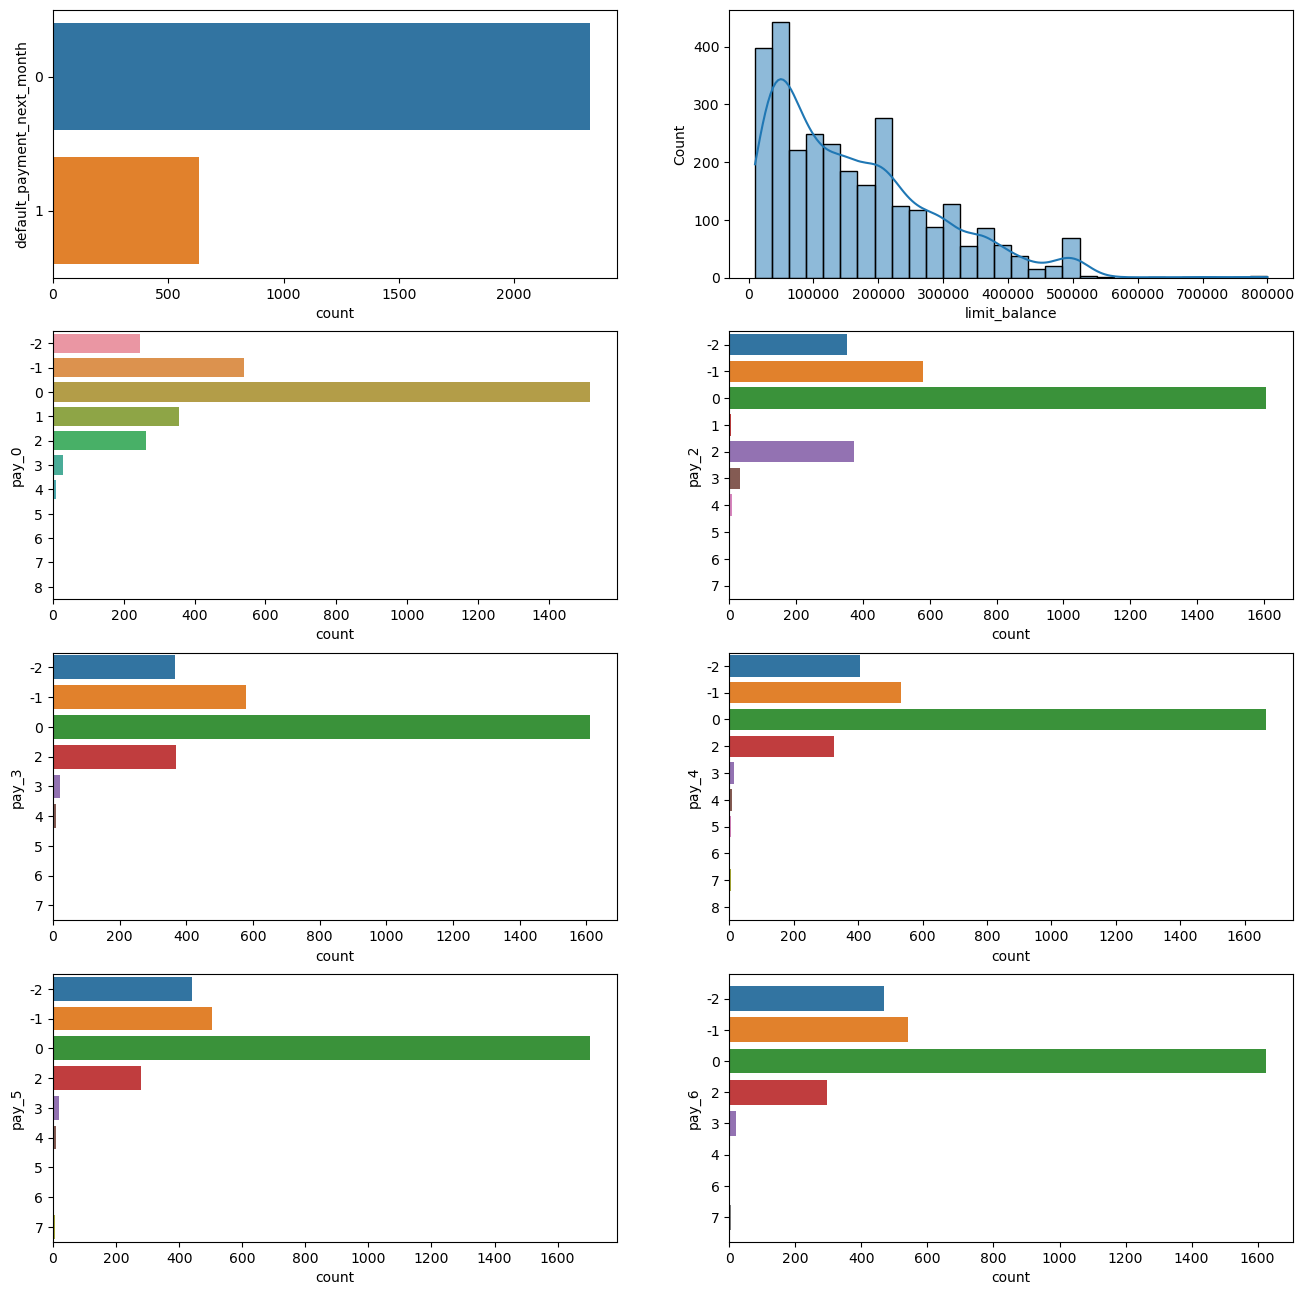

In [89]:
# plot distibrusi data
plt.figure(figsize=[16,16])

plt.subplot(421)
sns.countplot(data=df_new, y='default_payment_next_month')

plt.subplot(422)
sns.histplot(data=df_new, x='limit_balance', bins=30, kde=True)

plt.subplot(423)
sns.countplot(data=df_new, y='pay_0')

plt.subplot(424)
sns.countplot(data=df_new, y='pay_2' )

plt.subplot(425)
sns.countplot(data=df_new, y='pay_3' )

plt.subplot(426)
sns.countplot(data=df_new, y='pay_4' )

plt.subplot(427)
sns.countplot(data=df_new, y='pay_5' )

plt.subplot(428)
sns.countplot(data=df_new, y='pay_6' )

plt.plot()

Dari hasil plot diatas terdapat beberapa informasi yang dapat diiambil yaitu:
- Distribusi data `default_payment_next_month` sebagai target tidak seimbang `(imbalance data)`
- Beggitupun untuk kolom fitur `pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 ` juga memiliki distribusi data `imbalance`
- Pada data numerik, `limit_balance` memiliki distribusi data tidak normal dengan data berfokus pada sisi kiri 

Data imbalance untuk saat ini tidak dilakukan handling, namun hal ini akan berpengaruh pada jenis `scoring` dari prediksi machine learning. Dengan adanya imbalance data pada target maka scoring yang akan digunakan adalah `classification report` atau `confusion matrix`.

Sedangkan pada data numerik akan dilakukan handling outlier agar distribusi data menjadi normal.

# 5 - Feature Engineering

> Setelah memperoleh fitur dan target beserta informasi mengenai distribusi datanya, maka langkah selanjutnya adalah melakukan preprocessing data

## Menentukan Fitur Numerical Atau Categorical

In [90]:
# Menentukan kolom numerikal dan kategorial

num_columns = df_new.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_new.select_dtypes(include=np.object_).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 'default_payment_next_month']
Categorical Columns :  []


Dari data diatas terlihat bahwa tidak ada data dengan tipe kategorikal. Namun melalui proses EDA sebelumnya, penulis mengetahui bahwa terdapat beberapa fitur `kategorial` yang telah di lakukan `encoding` sehingga memiliki nilai `numerik`. Sehingga penulis mementukan tipe data sebagai berikut

In [91]:
# Menentukan kolom numerikal dan kategorial

num_columns = ['limit_balance']
cat_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance']
Categorical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


> Kolom `'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'` adalah data kategorial sedangakan `'limit_balance'` adalah data numerik

## Splitting Train Test
Karena data imbalance maka split data mempertimbangkan persentase imbalance data dengan mengatur parameter `stratify` pada fungsi train tes split

In [92]:
# Pisahkan data train dan data test dengan train test split
data_train, data_test = train_test_split(df_new, test_size=0.2, random_state=412, stratify=df_new['default_payment_next_month'])
print(f"train size : {data_train.shape}")
print(f"test size : {data_test.shape}")

train size : (2371, 8)
test size : (593, 8)


In [93]:
# Reset Index data train dan data test
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

## Handling Outlier
Beberapa algoritma machine learning senstif terhadap outlier sehinggal dilakukan handling outlier berdasarkan distribusi datanya

### Nilai Skew Fitur Numerikal

In [94]:
# Looping untuk menghitung nilai skew fitur numerikal
for i in data_train[num_columns]:
        print(f'Nilai Skew {i} : {data_train[i].skew()}')

Nilai Skew limit_balance : 1.0654150132726317


> Fitur `limit_balance` memiliki nilai skew `lebih besar dari 0.5` yang memiliki arti bahwa distribusi datanya tidak normal sehingga handle outlier dengan tukey's Rule.

In [95]:
# Buat fungsi untuk cek outliers
def cek_outlier(data,col):
  skew = data[col].skew()
  if skew>=-0.5 and skew<=0.5:
    up_lim = data[col].mean() + 3*data[col].std()
    low_lim = data[col].mean() - 3*data[col].std()
  else:
    Q1 = np.percentile(data[col],25)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q1 + (1.5*IQR)
    low_lim = Q3 - (1.5*IQR)
  
  outliers = data[(data[col]<low_lim) | (data[col]>up_lim)]

  return outliers, up_lim, low_lim

In [96]:
# Cek outlier column education num dan hours per week
limit_balance_out,limit_balance_up, limit_balance_low = cek_outlier(data_train,'limit_balance')

# Tampilkan persentase outlier masing masing fitur terhadap seluruh data train
print(f'Persentase outlier Limit Balance : {len(limit_balance_out)/len(data_train)*100:.2f}%')

Persentase outlier Limit Balance : 11.30%


Persentase outlier pada fitur limit balance adalah `11%`. Karena jumlah keseluruhan data yang cukup besar, maka jumlah outlier ini masih dapat dilakukan `trimming`.

In [97]:
data_train = data_train[(data_train['limit_balance'] >= limit_balance_low) & (data_train['limit_balance'] <= limit_balance_up)]

Setelah melakukan trimming pada outlier, penulis kembali melakukan pengecekan pada `distribusi data` melalui nilai skewness

In [98]:
# Looping untuk menghitung nilai skew fitur numerikal
for i in data_train[num_columns]:
        print(f'Nilai Skew {i} : {data_train[i].skew()}')


Nilai Skew limit_balance : 0.4993630306695545


Dapat dilihat pada hasil print out bahwa distribusi data fitur `limit_balance` sudah normal dengan nilai skewnews dibawah 0.5 yaitu `0.49`

## Handling Missing Values
Seletah handling outlier, selanjutnya pengecekan missing value dan kemudian dilakukan handling apabila ditemukan missing value

In [99]:
# Check Missing Values pada data train
data_train.isnull().sum()

pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
limit_balance                 0
default_payment_next_month    0
dtype: int64

In [100]:
# Check Missing Values pada data test
data_test.isnull().sum()

pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
limit_balance                 0
default_payment_next_month    0
dtype: int64

> Dari pengecekan `data train` dan `data test` tidak ditemukan kolom yang memiliki `missing value`

## Splitting Fitur Target

> Setelah dataset bersih dari outlier dan missing value, selanjutnya memisahkan `fitur` dengan `target` dari masing masing `data train` dan `data test`

In [101]:
# Split  `X` (Features) dan `y` (Target) pada Data Train

X_train = data_train.drop('default_payment_next_month', axis=1)
y_train = data_train['default_payment_next_month']
X_train.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,0,0,0,0,0,0,50000
1,0,-1,-1,-1,-1,-1,140000
2,-2,-2,-2,-2,-2,-2,230000


In [102]:
# Split  `X` (Features) dan `y` (Target) pada Data Test

X_test = data_test.drop('default_payment_next_month', axis=1)
y_test = data_test['default_payment_next_month']
X_test.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,0,0,0,0,0,0,90000
1,0,0,0,0,0,0,30000
2,1,-1,-1,0,-1,-1,280000


## Split between Numerical Columns and Categorical Columns

> Dataset memiliki 2 tipe fitur yaitu `numerikal` dan `kategorial`. Namun karena data `kategorikal` sudah berbentuk numerik, maka dilakukan scalling bersamaan dengan data `numerikal`

## Feature Scaling

In [103]:
# Tampilkan numerikal data train
X_train.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,0,0,0,0,0,0,50000
1,0,-1,-1,-1,-1,-1,140000
2,-2,-2,-2,-2,-2,-2,230000


> Karena distribusi data pada fitur `numerikal` sudah `normal`, maka scaling dilakukan dengan menggunakan `StandarScaler`

In [104]:
# Feature Scaling using Standard Karena Distribusi Sudah Memiliki Distribusi Normal

scaler = StandardScaler()
feature_names = scaler.get_feature_names_out(input_features=X_train.columns)

X_train_num_scaled = scaler.fit_transform(X_train)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=feature_names)

X_test_num_scaled = scaler.transform(X_test)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=feature_names)

X_train_num_scaled.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,-0.06,0.04,0.05,0.11,0.16,0.17,-0.91
1,-0.06,-0.82,-0.79,-0.73,-0.70,-0.67,0.13
2,-1.91,-1.68,-1.63,-1.57,-1.56,-1.52,1.17


## Feature Encoding
Karena semua fitur `kategorikal` sudah dalam bentuk `numerik` , maka encoding dilakukan `scalling` saja sekaligus dengan Data Numerik

## Making Final Data

Karena data hanya dilakukan proses scalling, maka data train final adalah data yang di scaled

In [105]:
# Gabungkan kembali fitur numerikal dan kategorial

X_train_final = X_train_num_scaled
X_test_final = X_test_num_scaled

X_train_final.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance
0,-0.06,0.04,0.05,0.11,0.16,0.17,-0.91
1,-0.06,-0.82,-0.79,-0.73,-0.70,-0.67,0.13
2,-1.91,-1.68,-1.63,-1.57,-1.56,-1.52,1.17


# 6 - Model Definition

Untuk menentukan algoritma model yang akan di pakai, penulis melakukan `cross validation` pada beberapa `algoritma supervised learning` dengan `default parameter` dari masing masing algoritma kemudian `memilih` algoritma yang memiliki rata rata score `paling tinggi`.

Metode scoring yang akan dipakai adalah `recall` pada target dengan value `1`. Penulis menggunakan metode scoring ini karena model yang akan dibangun bertujuan untuk `memprediksi default pada customer credict card`. Sehingga model yang dibangun harus memiliki kesalahan prediksi seminimal mungkin pada kondisi aktual mengalami default namun model memprediksi tidak default ( False Negatif )

## Cross Validation Beberapa Model

In [106]:
all_model = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
 KNeighborsClassifier(), GaussianNB(), GradientBoostingClassifier()]

best_model = []
best_score = 0

for i in all_model:
    model = i
    model_cv =cross_val_score(model,X_train_final,y_train,cv=StratifiedKFold(n_splits=3, random_state = 2, shuffle= True ),scoring="recall")
    if model_cv.mean() > best_score:
        best_model = i
        best_score = model_cv.mean()

    print(f'\nModel {i}')
    print('Recall Score - All - Cross Validation  : ', model_cv)
    print('Recall Score - Mean - Cross Validation : ', model_cv.mean())
    print('Recall Score - Std - Cross Validation  : ', model_cv.std())
    print('Recall Score - Range of Test-Set       : ', (model_cv.mean()-model_cv.std()) , '-', (model_cv.mean()+model_cv.std()))

print(f'\nBest Model : {best_model}')
print(f'Best Score : {best_score}')


Model LogisticRegression()
Recall Score - All - Cross Validation  :  [0.33333333 0.3081761  0.27672956]
Recall Score - Mean - Cross Validation :  0.3060796645702306
Recall Score - Std - Cross Validation  :  0.023155893117792994
Recall Score - Range of Test-Set       :  0.28292377145243763 - 0.3292355576880236

Model SVC()
Recall Score - All - Cross Validation  :  [0.38993711 0.44654088 0.42767296]
Recall Score - Mean - Cross Validation :  0.4213836477987421
Recall Score - Std - Cross Validation  :  0.023532436394804658
Recall Score - Range of Test-Set       :  0.3978512114039374 - 0.4449160841935468

Model DecisionTreeClassifier()
Recall Score - All - Cross Validation  :  [0.31446541 0.40880503 0.41509434]
Recall Score - Mean - Cross Validation :  0.37945492662473795
Recall Score - Std - Cross Validation  :  0.046026202096646034
Recall Score - Range of Test-Set       :  0.3334287245280919 - 0.425481128721384

Model RandomForestClassifier()
Recall Score - All - Cross Validation  :  [0.

Dari hasil pengecekan cross validate diperoleh algoritma `GaussianNB` yang memiliki score rata - rata paling tinggi yaitu `0.458`. Namun penulis akan melakukan building model dengan 2 algoritma terbaik sehingga dipilih algoritman dengan peringkat score kedua yaitu `GradientBoostingClassifier` dengan score rata - rata `0.429`

### Model Definition


In [135]:
# Make column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler,X_train.columns)
    ])

# Make a model with pipeline for baseline parameter
nb_model = Pipeline(steps=[('preprocessor', preprocessor), ('nb', GaussianNB())])
gbc_model = Pipeline(steps=[('preprocessor', preprocessor), ('gbc', GradientBoostingClassifier())])

# 7 - Model Training

In [108]:
# Train Baseline Model Naive Bayes And Gradient Boosting
nb_model.fit(X_train, y_train)
gbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance'], dtype='object'))])),
                ('gbc', GradientBoostingClassifier())])

# 8 - Model Evaluation

> Metrics evaluasi yang digunakan adalah `Confusion Matrix` dan `Classification Report`.
> - `Classification Report` : Digunakan untuk Besaran Nilai dari hasil perhitungan antara hasil prediksi model dengan data aktual
> - `Confusion Matrix` : Digunakan untuk melihat peebandingan hasil prediksi model dengan data aktual dalam bentuk matrix.

### Predict Data

In [109]:
# Predict Data Train and Data Test with Naive Bayes
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

y_pred_train_gbc = gbc_model.predict(X_train)
y_pred_test_gbc = gbc_model.predict(X_test)

### Classification Report
#### Model Naive Bayes

In [110]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1626
           1       0.60      0.45      0.52       477

    accuracy                           0.81      2103
   macro avg       0.73      0.68      0.70      2103
weighted avg       0.79      0.81      0.80      2103



In [111]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       466
           1       0.58      0.47      0.52       127

    accuracy                           0.81       593
   macro avg       0.72      0.69      0.70       593
weighted avg       0.80      0.81      0.81       593



Sesuai penjelasan metode scorring pada bagian model definition, model ini memakai metode scorring `recall`. Nilai Recall dari model `Naive Bayes` dengan hyperparameter `baseline` pada `data train` adalah `0.45`

Sedangkan untuk performance pada `data test` adalah `0.47`. Apabila dibandingkan dengan performance pada data train maka model ini adalah `best-fit`. Namun apabila secara global masih `underfit` karena masih jauh dari maksimal performance yaitu `1`

#### Model Gradient Boosting

In [112]:
print(classification_report(y_train, y_pred_train_gbc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1626
           1       0.78      0.48      0.60       477

    accuracy                           0.85      2103
   macro avg       0.82      0.72      0.75      2103
weighted avg       0.85      0.85      0.84      2103



In [113]:
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       466
           1       0.72      0.48      0.58       127

    accuracy                           0.85       593
   macro avg       0.79      0.71      0.74       593
weighted avg       0.84      0.85      0.84       593



Pada model gradient boosting, Nilai recall pada `data train` adalah `0.48` dan pada data test adalah `0.48`. Secara perbandingan antara data train dan data test maka model ini adalah `best-fit` karena tidak ada selisih antara data train dan data test. Namun secara global masih `under fit` karena nilai masih jauh dari best performance yaitu `1`

### Confusion Matrix
#### Naive Bayes

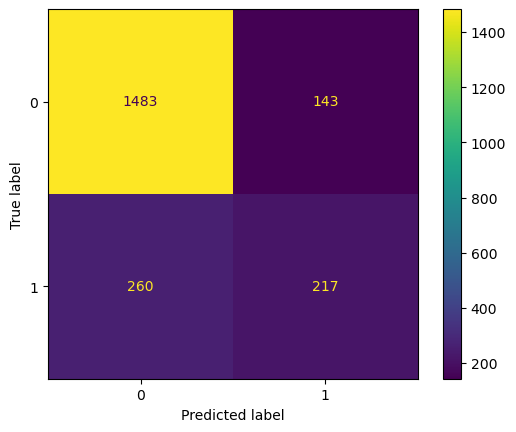

In [114]:
# Cek confusion matrix pada data train
cm_train_nb = confusion_matrix(y_train, y_pred_train_nb, labels=nb_model.classes_)
cm_disp_train_nb = ConfusionMatrixDisplay(confusion_matrix=cm_train_nb, display_labels=nb_model.classes_)

# plot confusion matrix
cm_disp_train_nb.plot()
plt.show()

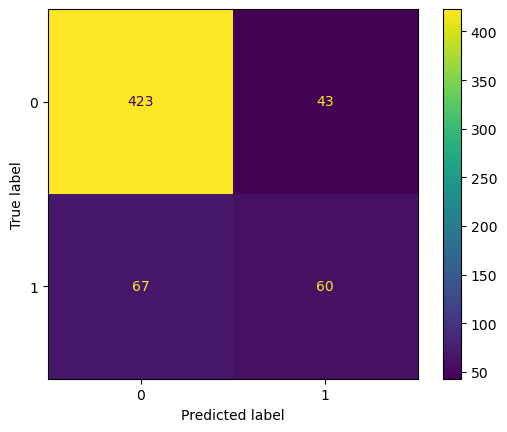

In [115]:
# Cek confusion matrix pada data test
cm_test_nb = confusion_matrix(y_test, y_pred_test_nb, labels=nb_model.classes_)
cm_disp_test_nb = ConfusionMatrixDisplay(confusion_matrix=cm_test_nb, display_labels=nb_model.classes_)

# plot confusion matrix
cm_disp_test_nb.plot()
plt.show()

Dari confusion matrix beberapa informasi yang mendukung dari classification report :
- Pada data train terdapat 260 data yang diprediksi tidak akan default bulan depan namun sebenarnya akan default
- Sedangkan pada data test terdapat 67 data yang salah prediksi

#### Gradient Boosting

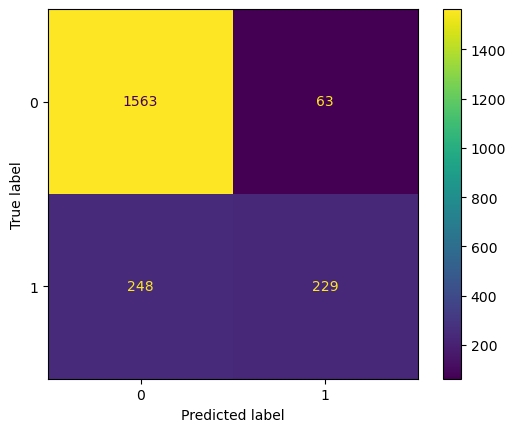

In [116]:
# Cek confusion matrix pada data train
cm_train_gbc = confusion_matrix(y_train, y_pred_train_gbc, labels=gbc_model.classes_)
cm_disp_train_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_train_gbc, display_labels=gbc_model.classes_)

# plot confusion matrix
cm_disp_train_gbc.plot()
plt.show()

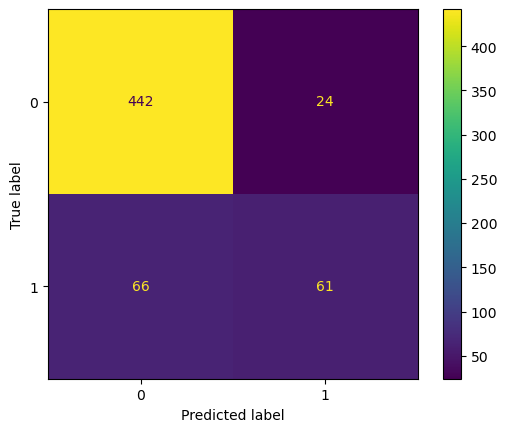

In [117]:
# Cek confusion matrix pada data train
cm_test_gbc = confusion_matrix(y_test, y_pred_test_gbc, labels=gbc_model.classes_)
cm_disp_test_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_test_gbc, display_labels=gbc_model.classes_)

# plot confusion matrix
cm_disp_test_gbc.plot()
plt.show()

Dari confusion matrix beberapa informasi yang mendukung dari classification report :
- Pada data train terdapat 248 data yang diprediksi tidak akan default bulan depan namun sebenarnya akan default
- Sedangkan pada data test terdapat 66 data yang salah prediksi

`Secara Confusion Matrix Terdapat perbedaan 2 Prediksi yang salah antara Model Naive  Bayes dengan Gradient Boosting`

Dari hasil performa model dengan parameter baseline, secara global masih `underfit`. Sehingga penulis mencoba untuk melakukan `hyperparamater tuning` dengan menggunakan metode `Grid Search` Dan `Random Search`

## Hyper Parameter Tuning
### Grid Search Gaussian Naive Bayes

In [118]:
# Make parameter for Naive Bayes
params_NB = {'nb__var_smoothing': np.logspace(0,-9, num=10)}

In [119]:
# Grid search for Naive Bayes
NB_grid = GridSearchCV(nb_model, param_grid=params_NB,cv=3, n_jobs=-1, scoring='recall')
NB_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         Index(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance'], dtype='object'))])),
                                       ('nb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'nb__var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='recall')

In [120]:
# Best score and best parameter from grid search algorithm Naive bayes
print(f'Best Score Grid Search Naive Bayes : {NB_grid.best_score_:.6f}')
print(f'Best Parameter Grid Search Naive Bayes : \n{NB_grid.best_params_}')

Best Score Grid Search Naive Bayes : 0.454927
Best Parameter Grid Search Naive Bayes : 
{'nb__var_smoothing': 0.01}


Hasil dari grid search pada GaussianNB adalah nilai `recall` paling tinggi adalah `0.454927` dengan best parameter `'var_smoothing': 0.01`

### Random Search Gradient Boosting 

In [121]:
# Make parameter for gradient boosting
param_gbc = {'gbc__learning_rate': [0.001, 0.01, 0.1, 1],
              'gbc__n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num = 10)],
              'gbc__criterion' : ['friedman_mse', 'squared_error'],
              'gbc__min_samples_split' : [int(x) for x in np.linspace(2,20,10)],
              'gbc__min_samples_leaf': [int(x) for x in np.linspace(start=2, stop=20, num = 10)],
              'gbc__max_depth': [1,2,3],
              'gbc__max_features' : ['auto', 'sqrt', 'log2']}


In [122]:
# Random search for Gradien Boosting
gbc_random = RandomizedSearchCV(gbc_model, param_distributions=param_gbc, n_iter=50, random_state=2023 ,cv=3, n_jobs=-1, scoring='recall')
gbc_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               Index(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance'], dtype='object'))])),
                                             ('gbc',
                                              GradientBoostingClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gbc__criterion': ['friedman_mse',
                                                           'squared_error'],
                                        'gbc__learning_rate': [0.001, 0.01, 0.1,
                                                               1],
                                        'gbc__max_depth': [1, 2, 3],
       

In [123]:
# Best score dan parameter gradient boosting with Random Search
print(f'Best Score Random Search Gradien Boosting : {gbc_random.best_score_:.6f}')
print(f'Best Parameter Random Search Gradien Boosting : \n{gbc_random.best_params_}')

Best Score Random Search Gradien Boosting : 0.452830
Best Parameter Random Search Gradien Boosting : 
{'gbc__n_estimators': 200, 'gbc__min_samples_split': 14, 'gbc__min_samples_leaf': 12, 'gbc__max_features': 'auto', 'gbc__max_depth': 2, 'gbc__learning_rate': 0.1, 'gbc__criterion': 'squared_error'}


Hasil dari Random search pada GradientBoostingClassifier adalah nilai `recall` paling tinggi adalah `0.452830` dengan best parameter :
- 'n_estimators': 200, 
- 'min_samples_split': 14, 
- 'min_samples_leaf': 12, 
- 'max_features': 'auto', 
- 'max_depth': 2, 
- 'learning_rate': 0.1, 
- 'criterion': 'squared_error'

### Model Definition With Best Parameter

In [124]:
# Make a model with pipeline for Tuning model
nb_model_tuning = Pipeline(steps=[('preprocessor', preprocessor), ('nb', GaussianNB(var_smoothing = 0.01))])
gbc_model_tuning = Pipeline(steps=[('preprocessor', preprocessor), ('gbc', GradientBoostingClassifier(n_estimators = 200, min_samples_split = 14,
                                     min_samples_leaf = 12, max_features= 'auto', max_depth= 2, learning_rate= 0.1,
                                      criterion= 'squared_error'))])


### Model Training And Evaluation With Best Params

In [125]:
# Model training with best parameters
nb_model_tuning.fit(X_train,y_train)
gbc_model_tuning.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance'], dtype='object'))])),
                ('gbc',
                 GradientBoostingClassifier(criterion='squared_error',
                                            max_depth=2, max_features='auto',
                                            min_samples_leaf=12,
                                            min_samples_split=14,
                                            n_estimators=200))])

In [126]:
# Predict Data Train and Data Test with Naive Bayes
y_pred_train_nb_tuning = nb_model_tuning.predict(X_train)
y_pred_test_nb_tuning = nb_model_tuning.predict(X_test)

# Predict Data Train and Data Test with Naive Bayes
y_pred_train_gbc_tuning = gbc_model_tuning.predict(X_train)
y_pred_test_gbc_tuning = gbc_model_tuning.predict(X_test)

### Classification Report
#### Naive Bayes

In [127]:
print(classification_report(y_train,y_pred_train_nb_tuning))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1626
           1       0.61      0.45      0.52       477

    accuracy                           0.81      2103
   macro avg       0.73      0.68      0.70      2103
weighted avg       0.80      0.81      0.80      2103



In [128]:
print(classification_report(y_test,y_pred_test_nb_tuning))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       466
           1       0.58      0.47      0.52       127

    accuracy                           0.81       593
   macro avg       0.72      0.69      0.70       593
weighted avg       0.80      0.81      0.81       593



#### Gradient Boosting

In [129]:
print(classification_report(y_train,y_pred_train_gbc_tuning))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1626
           1       0.76      0.46      0.58       477

    accuracy                           0.84      2103
   macro avg       0.81      0.71      0.74      2103
weighted avg       0.84      0.84      0.83      2103



In [130]:
print(classification_report(y_test,y_pred_test_gbc_tuning))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       466
           1       0.69      0.44      0.54       127

    accuracy                           0.84       593
   macro avg       0.78      0.69      0.72       593
weighted avg       0.82      0.84      0.82       593



### Comparison Between Before and After Tuning

Recap nilai recall pada data target dengan value `1` sebagai berikut :

Model Naive Bayes
- Data train :
    - Before tuning : 0.45
    - After tuning : 0.45
- Data test :
    - Before tuning : 0.47
    - After tunig : 0.47

Model Gradient Boosting
- Data train :
    - Before tuning : 0.48
    - After tuning : 0.46
- Data test :
    - Before tuning : 0.48
    - After tunig : 0.44

Kesimpulan :
- Pada model `naive bayes` tidak terdapat perbedaan antara model baseline dengan model yang sudah di tuning. 
- Sedangkan pada model `gradient boosting` terjadi `penurunan` nilai recall. Hal ini dapat terjadi karena model gradient boosting memiliki banyak hyper parameter sedangkan hyperparameter yang di tuning hanya beberapa dengan kombinasi yang tidak kompleks dikarenakan `keterbatasan device` dalam melakukan tuning ( Search )
- Sehingga model yang dipilh adalah Naive Bayes dengan Tuning dan Gradien Boosting tanpa Tuning

### Data Test with Model Prediction

In [131]:
# Make dataframe from model prediction
y_pred_test_nb_tuning_df = pd.DataFrame(y_pred_test_nb_tuning, columns=['Prediction NB'])
y_pred_test_gbc_tuning_df = pd.DataFrame(y_pred_test_gbc, columns=['Prediction GBC'])

In [132]:
# Concate data test with model prediction
data_inf_pred = pd.concat([data_test, y_pred_test_nb_tuning_df, y_pred_test_gbc_tuning_df],axis=1)
data_inf_pred.sample(10)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment_next_month,Prediction NB,Prediction GBC
525,-1,-1,2,-1,0,-1,100000,0,0,0
544,0,0,0,0,0,2,150000,1,0,0
67,0,0,0,-1,0,0,360000,0,0,0
443,1,-2,-2,-2,-2,-2,370000,0,0,0
471,0,0,0,0,0,0,240000,0,0,0
73,-1,-1,-1,2,2,3,80000,0,1,0
227,-1,0,0,0,0,-1,30000,1,0,0
148,-1,0,0,0,2,-1,210000,0,0,0
125,0,0,2,2,2,2,90000,1,1,1
452,0,0,0,0,-2,-1,180000,0,0,0


# 9 - Model Saving

Setelah model penulis anggap maksimal maka selanjutnya adalah proses penyimpanan model sehingga dapat di gunakan tanpa harus di lakukan train kembali

Model yang dipilih adalah model yang memiliki nilai recall score paling bagus

In [133]:
# Model Saving

with open('nb_model.pkl', 'wb') as file_1:
  pickle.dump(nb_model_tuning, file_1)

with open('gbc_model.pkl', 'wb') as file_2:
  pickle.dump(gbc_model, file_2)

# 10 - Conceptual Thinking
### Pengertian Criterion :
- `Criterion` adalah metode yang digunakan dalam pengambilan keputusan pada node. Criterion terdiri dari 2 :
    - Gini 
        - Metode pengambilan keputusan yang berdasarkan tingkat kemurnian dari suatu node. Semakin kecil nilai gini maka semakin homogen sampel pada node tersebut. Cendrung lebih baik digunakan pada dataset yang memiliki jumlah besar.
    - Entropy
        - Metode pengambilan keputusan yang berdasarkan tingkat keseimbangan pada suatu node. Semakin kecil nilai entropy maka semakin homogen sampel pada node tersebut. Digunakan pada dataset yang cenderung kecil

### Pengertian Pruning
- Pruning adalah teknik untuk mengurangi kompleksitas dari model dengan memberikan batasan batasan pada pengambilan keputusan yang berdampak pada performance model. Tujuan dari pruning adalah untuk mengantisipasi `overfitting` pada model karena kecendrungan dari tree based model adalah overfitting. Beberapa jenis pruning adalah :
    - Pre Pruning :
        - Membatasi kompleksitas dari model dengan cara memberikan batasan - batasan pada model sebelum model di bentuk.
        - Metode : Hyper parameter setting sebelum model di training.
    - Post Tuning :
        - Melakukan perampingan pada model yang telah selesai dibangun. Biasa dilakukan jika model mengalami overfitting
        - Metode :
            - Cost complexity pruning (CCP) : Melihat pengaruh setiap node berdasarkan cost complexity yang dimilikinya
            - Reduced Error Pruning : Melihat performance model setelah dilakukan penghapusan node

### Cara Memilih Nilai K pada KNN

- Cara memilih nilai K paling optimal adalah dengan metode elbow. 
    - Melakukan beberapa kali pengujian dengan nilai K yang berbeda
    - Hitung nilai eror setiap nilai K dan buat kedalam visaulisasi
    - Cari nilai k dengan nilai error yang membentuk siku ( elbow ) pada visualisasi

### Pengertian Cross Validation
- Cross validation adalah teknik untuk mengevaluasi suatu model dengan data yang belum digunakan (data train). Konsepnya adalah membagi data train menjadi beberapa bagian `(fold)`, kemudian melatih model dengan seluruh bagian data kecuali satu bagian (fold) yang akan digunkana sebagai evaluasi. Proses ini diulang sebanyak jumlah bagian data dengan data evaluasi yang selalu berubah setiap pengulangan. Jadi masing masing fold akan digunakan sebagai validasi data sebanyak 1 kali. Rata-rata nilai performance dari setiap fold digunakan sebagai penilaian kinerja model.

### Pengertian Metric Accuracy, Precision, Recall, F1 Score, dan Wawktu Penggunaanya
- Semua metric di atas adalah metrics yang digunakan untuk mengevaluasi performance model klasifikasi. Perbedaan masing - masing metriks adalah :
    - `Accuracy`
        - Metric yang digunakan untuk mengukur performance model dengan membagi hasil penjumlahan total prediksi model yang benar terhadap keseluruhan data. Metrics ini digunakan apabila distribusi data pada target prediksi seimbang `(balance)`
    - `Precision`
        - Metric yang digunakan apabila distribusi data pada target yang `imbalance`. Lebih spesifik, precission adalah nilai performance model memprediksi secara benar terhadap jumlah data prediksi yang benar ditambah dengan kesalahan prediksi yang positif (False Positiv)
    - `Recall`
        - Tidak berbeda jauh dengan precision, Recall juga digunakan pada data yang memiliki distribusi data tatrget `imbalance`. Perbedaanya adalah pada proses pembagian jumlah prediksi yang benar terhadap jumlah prediksi yang benar setelah di tambah kesalaha  prediksi yang nrgatif (False Negatif)
    - `F1-Score`
        - Masih pada data `imbalance` namun semua kelas pada data target sama pentingnya. Sehingga nilai f1 adalah rata rata harmonisa dari Precision dan Recall

# 11 - Pengambilan Kesimpulan
## Model Analysis
### Naive Bayes

Beberapa analisa dari model logistik regresi:
- Performa model pada` data train` dan `data test` tidak berbeda jauh sehingga dapat dikatakan bahwa model ini memiliki predikat `good fit`
- Bila tidak berfokus pada salah satu kondisi dari prediksi ( contoh prediksi customer akan default atau bernilai 1 ) dan mempertimbankan persentase distibusi data target, Secara spesifik dengan menggunakan metric classification report, performa model dapat dilihat dengan menggunakan f1-score weighted yaitu `0.80`.
- Namun apabila berfokus pada salah satu kondisi prediksi maka performa model adalah :
    - Prediksi `0` memiliki nilai `0.88`
    - Prediksi `1` memiliki nilai `0.52`
- Terdapat perbedaan yang cukup signifikan pada performa apabila mempertimbangkan kepentingan kelas target. Hal ini disebabkan karena adanya `imbalance` data pada kelas target dengan persentase `77% :23%` pada kelas `0 : 1`
- Tidak ada perbedaan performa pada model dengan `baselin` dengan model yang telah di tuning dengan `Grid Search` 

Kelebihan dan Kelamahan Model Logistik Regresi berikut adalah:
- Kelebihan :
    - Secara global model cukup baik memprediksi
    - Model memiliki performa yang sama antara data train dan data test
- Kelemahan : 
    -  Underfit pada prediksi apabila berfokus pada salah satu kondisi prediksi


### Gradient Boosting Classifier
- Tidak berbeda jauh dengan model Naive Bayes, model SVC juga memiliki performa yang baik secara global namun kurang baik apabila mempertimbangkan tingkat kepentingan kelas target.
- Namun terdapat perbedaan `0.2` pada performance data test dan dan data train setelah model di tuning, Sedangkan pada model baseline tidak terdapat perbedaan

- Kelebihan dan kekurangan model juga relative sama. 


### Further Improvement
Untuk imporvement selanjutnya dari model ini adalah sbb :
- Handling data imbalance agar model bisa lebih maksimal dalam proses training
- Melakukan hyper parameter tuning yang dengan kombinasi hyper parameter yang lebih beragam agar mendapatkan model dengan performa lebih baik


## Overall Analysis
Secara keseluruhan proses yang dilakukan pada project ini adalah:
- Import semua library yang di butuhkan
- Load dataset dan eksplorasi basic info dari data
- Exploarsi Data Analytics untuk menemukan insight. Pada tahapan ini juga mencari informasi menarik atau insight bussiness maupun informasi yang dapat digukanan untuk pemilihan fitur
- Feature selection dengan menggunakan phi correlation yang selanjutnya diperkuat dengan plot hubungan antara fitur dengan target
- Data preprocessing dimana pada tahap ini melakukan beberapa hal seperti :
    - Data cleaning dari missing value dan outlier, 
    - Feature engineering:
        - Scaling untuk fitur numerik dan kategorik karena tipe data kategorik sudah berbentuk numerikal
    - Split data set menjadi data train dan data test
- Menentukan model yang akan di pakai berdasarkan nilai rata rata dari hasil cross validation
- Training Model yang memiliki nilai rata rata cross validation paling tinggi dengan baseline parameter
- Evaluasi model dengan menggunakan metrik evaluasi recall. 
- Tuning hyper parameter model dengan Grid Search dan Random Search
- Evaluasi model yang telah di tuning
- Bandingkan performa model sebelum dan setelah di tuning.
- Pilih model dengan performance paling baik
- Saving model

Analysis selanjutnya adalah dari sisi hyper parameter tuning
- Pada model Naive Bayes hyper paramater terbaik adalah `var_smoothing': 0.01`
- Best Parameter Random Search Gradien Boosting : 
    - {'gbc__n_estimators': 200, 'gbc__min_samples_split': 14, 'gbc__min_samples_leaf': 12, 'gbc__max_features': 'auto', 'gbc__max_depth': 2, 'gbc__learning_rate': 0.1, 'gbc__criterion': 'squared_error'}
- Perlu dilakukan tuning hyperparameter lebih beragam agar memperoleh model yang performa lebih baik
- Langkah - langkah hyper parameter tuning dengan gridsearch dan random search :
    - Memisahkan kategori fitur berdasarkan jenisnya
    - Membuat list tiap hyperparameter yang akan di tuning
    - Melakukan fitting model dengan data train
    - Melakukan predict dengan masing masing hyperparameter sesuai list yang telah dibuat.
    - Mengambil hyperparameter yang memiliki score paling tinggi

 
Beberapa informasi yang dapat diperoleh dari proses EDA adalah :

- Tidak ada hubungan jenjang pendidikan dengan limit balance yang diberikan. Terbukti limit balance `graduate school` lebih tinggi dari `university` 
- Terdapat `8.8% pria` yang bulan depan akan `default` dan `12.6% wanita`. Sisanya sebanyak` 48.2% wanita` dan `30.4% pria` tidak mengalami default
- Umur tidak mempengaruhi limit balance kartu kredit customer
- Rata - rata usia customer yang sudah menikah mendekati 40 tahun sedangkan usia customer single sekitar 30 tahun.
- Berdasarkan jenjang pendidikan, terdapat perbedaan yang signifikan pada customer yang akan mengalami default bulan depan. Jenjang pendidikan `university` merupakan mayoritas yang akan mengalami default sebanyak `53.9%`disusul oleh `graduate school` dengan `23.9%` dan `high school` dengan `17.8%`
- Sedangkan berdasarkan status pernikahan tidak terpaut jauh yakni `51.5%` dengan status `single` sisanya adalah customer yang sudah menikah. Sehingga penulis dapat mengasumsikan bahwa status pernikahan tidak mempengaruhi default.
- Begitupun dari sisi gender. `Wanita` yang akan default sebanyak `58,7%` sisanya adalah `pria` sebanyak `41.3%`.
- Yang menarik adalah mayoritas customer yang akan default memiliki limit balance `under 50K`. Sedangkan pada limit `'50k - 100K', '100K - 200K', '200k - 400K'` relatif sama pada range `19% - 22%` dan customer dengan limit `lebih dari 400K` hanya `1.4%`